## Chapter 7: Linear multi-class classification

# 7.6  Classification Quality Metrics

In this Section we describe simple metrics for judging the quality of a trained multi-class classification model, as well as how to make predictions using one.

In [2]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib

# demos for this notebook
regress_plotter = superlearn.lin_regression_demos
optimizers = optlib.optimizers
static_plotter = optlib.static_plotter.Visualizer()
datapath = '../../mlrefined_datasets/superlearn_datasets/'

# import autograd functionality to bulid function's properly for optimizers
import autograd.numpy as np

# import timer
from datetime import datetime 

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## Making predictions using a trained model

If we denote the optimal set of weights found by minimizing a classification cost function (or via performing OvA), employing by default label values $y_p \in \left\{0,1,...,C-1\right\}$, by $\mathbf{W}^{\star}$ then note we can write our fully tuned linear model as 

\begin{equation}
\text{model}\left(\mathbf{x},\mathbf{W}^{\star}\right) =  \mathring{\mathbf{x}}_{\,}^T\mathbf{W}^{\star}   
\end{equation}

This fully trained model defines an optimal decision boundary for the training dataseet which is defined by the fusion rule

\begin{equation}
\underset{c=0,...,C-1}{\text{argmax}}\,\, \mathbf{x}^T \mathbf{w}_c^{\star}.
\end{equation}

To predict the label $y$ of an input $\mathbf{x}$ we then process it through this rule as

\begin{equation}
y_{\,} = \underset{c=0,...,C-1}{\text{argmax}}\,\, \mathbf{x}^T \mathbf{w}_c^{\star} 
\end{equation}

where any point lying *exactly* on the decision boundary should be assigned a label randomly based on the index of those classifiers providing maximum evaluation.

<figure>
  <img src= '../../mlrefined_images/superlearn_images/multiclass_prediction.png' width="85%" height="80%" alt=""/>
  <figcaption>   
<strong></strong> <em> 

</em>  </figcaption> 
</figure>

##  Confidence scoring

Once a proper decision boundary is learned, we can judge its *confidence* in any point based on *the point's distance to the decision boundary*.  More specifically we can its the exponentially normalized distance to score our confidence in the prediction, as described in [Section 7.5.3](https://jermwatt.github.io/machine_learning_refined/notes/7_Linear_multiclass_classification/7_5_Categorical.html).

##  Judging the quality of a trained model using *accuracy*

To *count the number of misclassifications* a trained multi-class classifier forms over our training dataset we simply take a raw count of the number of training datapoints $\mathbf{x}_p$ whose true label $y_p$ is predicted *incorrectly*.   To compare the point $\mathbf{x}_p$'s predicted label $\hat{y}_p =  \underset{j=0,...,C-1}{\text{argmax}}\,\, \mathbf{x}_p^T \mathbf{w}_j^{\star} $ and true true label $y_p$ we can use an identity function $\mathcal{I}\left(\cdot\right)$ and compute

\begin{equation}
\mathcal{I}\left(\hat{y}_p,\,\overset{\,}{y}_p\right) = 
\begin{cases}
0 \,\,\,\,\,\text{if} \,\, \hat{y}_p,= \overset{\,}{y}_p \\
1 \,\,\,\,\,\text{if} \,\,  \hat{y}_p,\neq \overset{\,}{y}_p. \\
\end{cases}
\end{equation}

Summing all $P$ points gives the total number of misclassifications of our trained model


\begin{equation}
\text{number of misclassifications} = \sum_{p=1}^P \mathcal{I}\left(\hat{y}_p,\,\overset{\,}{y}_p\right).
\end{equation}

Using this we can also compute the *accuracy*  - denoted $\mathcal{A}$ - of a trained model.  This is simply the percentage of training dataset whose labels are correctly predicted by the model.

\begin{equation}
\mathcal{A}= 1 - \frac{1}{P}\sum_{p=1}^P \mathcal{I}\left(\hat{y}_p,\,\overset{\,}{y}_p\right).
\end{equation}

The accuracy ranges from 0 (no points are classified correctly) to 1 (all points are classified correctly).  

#### <span style="color:#a50e3e;">Example 6: </span> Comparing cost function and counting cost values

Below we compare the number of misclassifications versus the multi-class softmax cost with regularizer. In this instance $\lambda = 10^{-5}$ for three runs of unnormalized gradient descent using a steplength parameter $\alpha = 10^{-2}$ for all three runs.

<IPython.core.display.Javascript object>


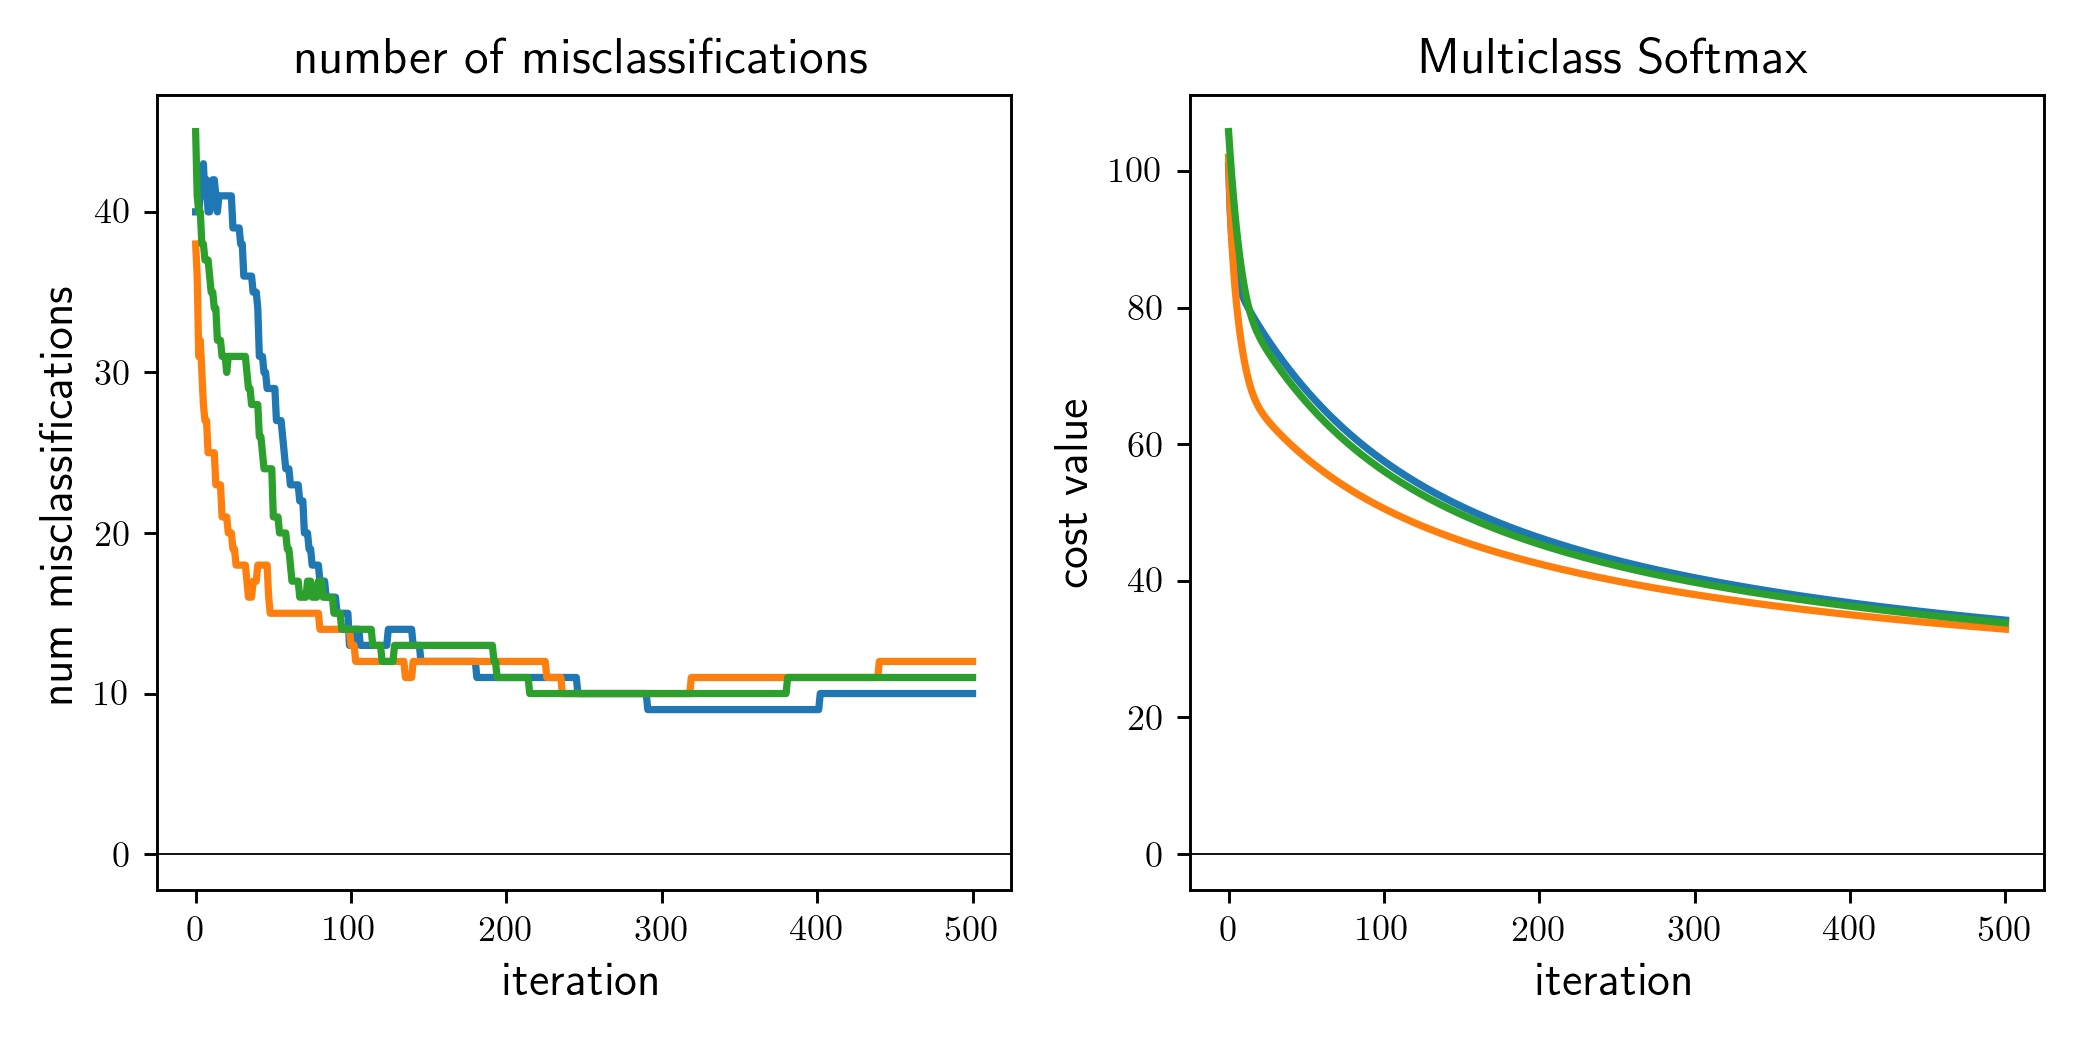

In [12]:
# This code cell will not be shown in the HTML version of this notebook
# load in dataset
data = np.loadtxt(datapath + '5class_data.csv',delimiter = ',')

# create an instance of the ova demo
demo = superlearn.multiclass_illustrator.Visualizer(data)

# run demo
demo.compare_to_counting(num_runs = 3,max_its = 500,alpha = 10**(-2),lam = 10**(-5))

Comparing the left and right panels we can see that the number of misclassifications and Softmax evaluations at each step of a gradient descent run do not perfectly track one another.  That is, it is not the case that just because the cost function value is decreasing that so too is the number of misclassifications. Again, this occurs because our Softmax cost is only an approximation of the true quantity we would like to minimize.  

This simple example an extremely practical implication: after a running a local optimization to minimize a two-class classification cost function the best step, and corresponding weights, are associated with the lowest *number of misclassifications* (or likewise the *highest accuracy*) **not** the lowest cost function value.

## The confusion matrix and additional quality metrics

We can generalize the idea of a confusion matrix, introduced in [Section 6.8](https://jermwatt.github.io/machine_learning_refined/notes/6_Linear_twoclass_classification/6_8_Metrics.html) for two-class classification problems, to form such matrices for problems with arbitrary number of classes. In general the confusion matrix associated to a classification problem with $C\geq2$ classes will be of size $C\times C$, whose $\left(i,j\right)^{\textrm{th}}$
entry is the number of data points that have $y=i$ and $\hat{y}=j$.  The Figure below shows the confusion matrix computed for the four-class classifier previously in e.g., [Section 7.2](https://jermwatt.github.io/machine_learning_refined/notes/7_Linear_multiclass_classification/7_2_OvA.html).

<figure>
  <img src= '../../mlrefined_images/superlearn_images/confusion_multiclass.png' width="85%" height="80%" alt=""/>
  <figcaption>   
<strong></strong> <em>  </em>  </figcaption> 
</figure>